In [17]:
import numpy as np
import matplotlib.pyplot as plt 

In [18]:
def f(x, y):
    return x**2 + y**2 + 10*np.sin(x) + 10*np.cos(y)

In [19]:
def grad_f(x, y):
    dfdx = 2*x + 10*np.cos(x)
    dfdy = 2*y - 10*np.sin(x)
    return dfdx, dfdy

In [20]:
def gradient_descent(x0, y0, lr=0.05, steps = 60):
    x, y = x0, y0
    path = [(x, y ,f(x, y))]
    for _ in range(steps):
        gx, gy = grad_f(x, y)
        x = x - lr*gx
        y = y - lr*gy
        path.append((x, y, f(x, y)))
    return np.array(path)


In [21]:
xmin, xmax = -8, 8
ymin, ymax = -8, 8

xs = np.linspace(xmin, xmax, 400)
ys = np.linspace(ymin, ymax, 400)

X, Y = np.meshgrid(xs, ys)
Z = f(X, Y)

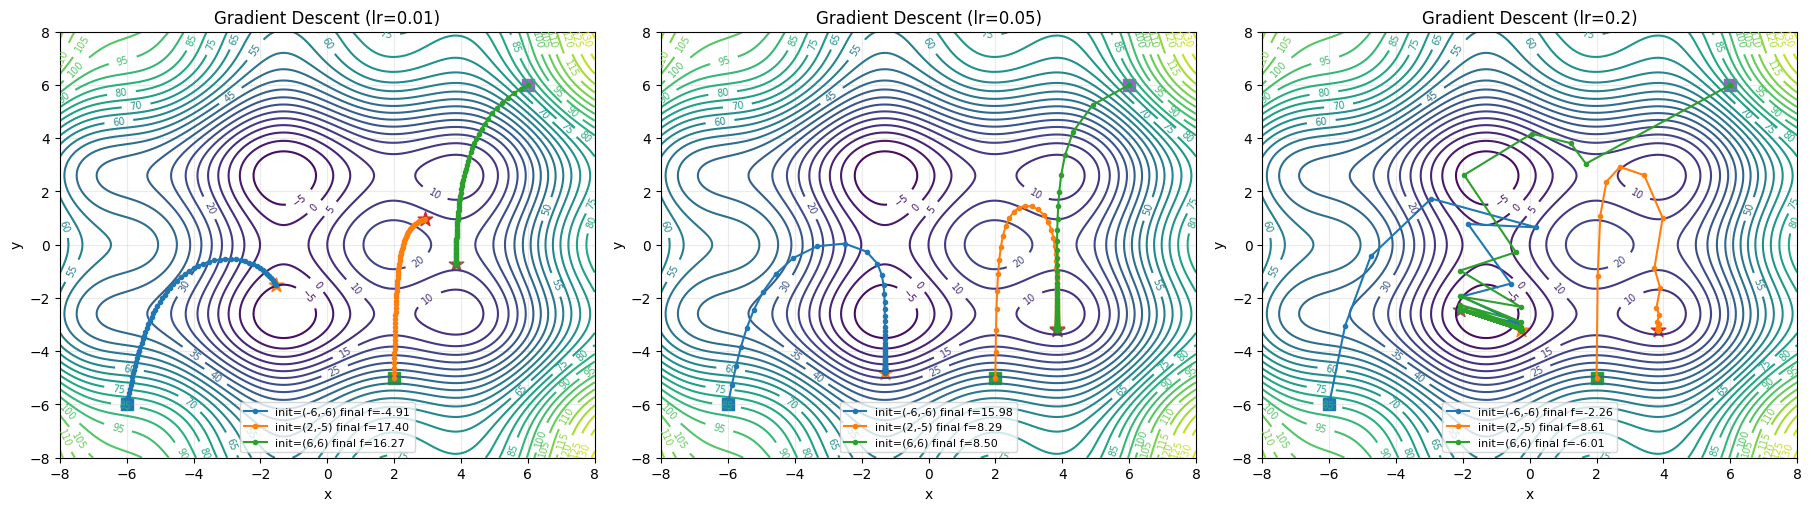

In [22]:
learning_rates = [0.01, 0.05, 0.2]                      # 3 different learning rates
initial_points = [(-6, -6), (2, -5), (6, 6)]            # 3 different initial points
steps = 60

fig, axes = plt.subplots(1, len(learning_rates), figsize=(18, 5), constrained_layout=True)

for ax, lr in zip(axes, learning_rates):
    # draw contour
    contours = ax.contour(X, Y, Z, levels=35)
    ax.clabel(contours, inline=True, fontsize=7)

    for (x0, y0) in initial_points:
        path = gradient_descent(x0, y0, lr=lr, steps=steps)

        # plot the path
        ax.plot(path[:, 0], path[:, 1], marker='o', markersize=3, linewidth=1.5,
                label=f"init=({x0},{y0}) final f={path[-1,2]:.2f}")

        # mark start (square) and end (star)
        ax.scatter(path[0, 0], path[0, 1], s=80, marker='s')
        ax.scatter(path[-1, 0], path[-1, 1], s=120, marker='*')

    ax.set_title(f"Gradient Descent (lr={lr})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True, alpha=0.25)
    ax.legend(fontsize=8)

plt.show()
